In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Layer, Activation, Dropout, Flatten, Dense, GlobalAvgPool2D as GAP,GlobalMaxPool2D, Dropout, BatchNormalization
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


In [3]:
batch_size = 32
img_size = 224
base_dir = '../dataset/Image/raw-img/'

In [3]:
datagen = ImageDataGenerator(rescale=1/255.,
                             rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest',
                             validation_split=0.2)

train_generator = datagen.flow_from_directory(base_dir,  
                                                target_size=(img_size, img_size), 
                                                batch_size=batch_size,
                                                shuffle=True,
                                                class_mode='categorical',
                                                subset='training')  

validation_generator = datagen.flow_from_directory(base_dir,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    class_mode='categorical',
                                                    subset='validation')

Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


In [4]:
print(train_generator.samples)
print(train_generator.class_indices)
print(validation_generator.samples)
print(validation_generator.class_indices)

20947
{'cane': 0, 'cavallo': 1, 'elefante': 2, 'farfalla': 3, 'gallina': 4, 'gatto': 5, 'mucca': 6, 'pecora': 7, 'ragno': 8, 'scoiattolo': 9}
5232
{'cane': 0, 'cavallo': 1, 'elefante': 2, 'farfalla': 3, 'gallina': 4, 'gatto': 5, 'mucca': 6, 'pecora': 7, 'ragno': 8, 'scoiattolo': 9}


In [5]:
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel"}

In [6]:
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2

In [7]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 3, verbose=1,factor=0.5, min_lr=0.00001)

In [8]:
# model = tf.keras.models.Sequential([
#     # Note the input shape is the desired size of the image 224 x 224 with 3 bytes color
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Dropout(0.4),  
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Dropout(0.4),  
#     # Flatten the results to feed into a DNN
#     tf.keras.layers.Flatten(), 
#     # 512 neuron hidden layer
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dropout(0.2),  
#     tf.keras.layers.Dense(10, activation='softmax')  
# ])

In [9]:
from tensorflow.keras.applications import ResNet50, ResNet50V2, InceptionV3, Xception, ResNet152, ResNet152V2

In [10]:
# Specify Model Name
name = "ResNet152V2"

# Pretrained Model
base_model = ResNet152V2(include_top=False, input_shape=(256,256,3), weights='imagenet')
base_model.trainable = False # Freeze the Weights

# Model 
resnet152V2 = Sequential([
    base_model,
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    GlobalMaxPool2D(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
], name=name)

In [11]:
# Compile
resnet152V2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = resnet152V2.fit(
      train_generator,
      # steps_per_epoch=25, 
      epochs=5,
      validation_data=validation_generator,
      # validation_steps=5, 
      callbacks = [learning_rate_reduction])

Epoch 1/5
655/655 [==============================] - 2999s 5s/step - loss: 0.4799 - accuracy: 0.8732 - val_loss: 0.2909 - val_accuracy: 0.9178 - lr: 0.0010
Epoch 2/5
655/655 [==============================] - 2997s 5s/step - loss: 0.3104 - accuracy: 0.9169 - val_loss: 0.2683 - val_accuracy: 0.9318 - lr: 0.0010
Epoch 3/5
655/655 [==============================] - 2989s 5s/step - loss: 0.2563 - accuracy: 0.9287 - val_loss: 0.2313 - val_accuracy: 0.9371 - lr: 0.0010
Epoch 4/5
655/655 [==============================] - 2811s 4s/step - loss: 0.2345 - accuracy: 0.9340 - val_loss: 0.2319 - val_accuracy: 0.9308 - lr: 0.0010
Epoch 5/5
655/655 [==============================] - 2864s 4s/step - loss: 0.2149 - accuracy: 0.9394 - val_loss: 0.2068 - val_accuracy: 0.9417 - lr: 0.0010


In [13]:
resnet152V2.summary()

Model: "ResNet152V2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 8, 8, 2048)        58331648  
                                                                 
 conv2d (Conv2D)             (None, 6, 6, 32)          589856    
                                                                 
 global_max_pooling2d (Globa  (None, 32)               0         
 lMaxPooling2D)                                                  
                                                                 
 dense (Dense)               (None, 256)               8448      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                       

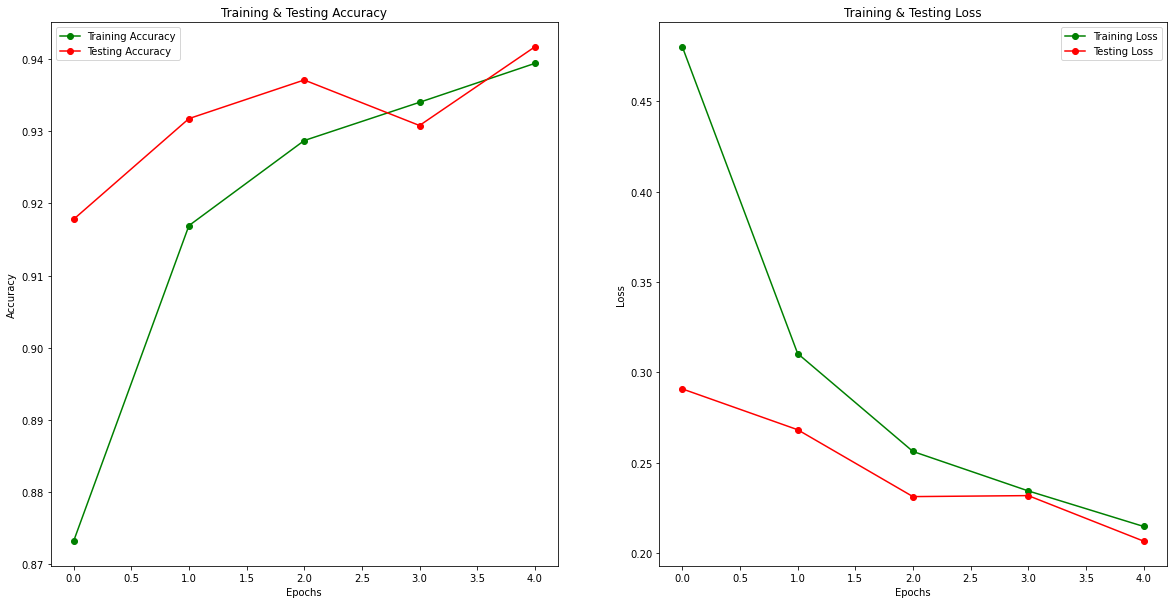

In [14]:
epochs = [i for i in range(5)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
# Menyimpan model dalam format SavedModel
import pathlib


export_dir = 'saved_model/'
tf.keras.models.save_model(resnet152V2, export_dir)

In [ ]:
# Convert SavedModel menjadi vegs.tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('vegs.tflite')
tflite_model_file.write_bytes(tflite_model)

In [26]:
import pathlib

export_dir = 'saved_model/'
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
converter.optimizations = [tf.lite.Optimize.DEFAULT] #ngecilin ukuran model
# converter.representative_dataset = representative_dataset
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('model2.tflite')
tflite_model_file.write_bytes(tflite_model)

60963232

In [24]:
model = tf.keras.models.load_model('./saved_model/')

In [5]:
model.summary()

Model: "ResNet152V2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 8, 8, 2048)        58331648  
                                                                 
 conv2d (Conv2D)             (None, 6, 6, 32)          589856    
                                                                 
 global_max_pooling2d (Globa  (None, 32)               0         
 lMaxPooling2D)                                                  
                                                                 
 dense (Dense)               (None, 256)               8448      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                       

In [18]:
import cv2

image = cv2.imread('../dataset/Image/test3.jpg')

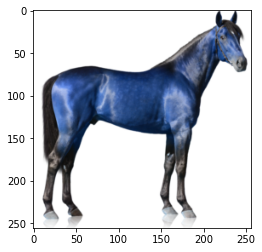

In [19]:
from PIL import Image
image = Image.fromarray(image)
img = image.resize((256, 256), Image.BILINEAR) 
plt.imshow(img)

In [20]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 256, 256, 3)


In [21]:
img = img/255.

In [279]:
# from tensorflow.keras.preprocessing import image

In [280]:
# img = image.load_img('../dataset/Image/test2.jpg', target_size=(244,244))

# imgplot = plt.imshow(img)
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
# tebak = np.vstack([x])
 

In [22]:
pred = np.argmax(model.predict(img))
pred

1

In [23]:
for x,y in train_generator.class_indices.items():
    if y == pred:
        print(translate[x])

NameError: name 'train_generator' is not defined

In [283]:
translate

{'cane': 'dog',
 'cavallo': 'horse',
 'elefante': 'elephant',
 'farfalla': 'butterfly',
 'gallina': 'chicken',
 'gatto': 'cat',
 'mucca': 'cow',
 'pecora': 'sheep',
 'scoiattolo': 'squirrel'}